# Regresion Lineal

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./datasets/Advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
feature_cols = ["TV", "Radio", "Newspaper"]
X = data[feature_cols]
y = data["Sales"]

In [4]:
x1 = X[["TV"]]
x2 = X[["Radio"]]
x3 = X[["Newspaper"]]

9) ¿Cuál variable explica mayor porcentaje (o mayor proporción) de la varianza existente en las ventas (Sales)?

1.  x1 = TV
2.  x2 = Radio
3.  x3 = Newspaper  

# Feature engineer

In [5]:
#Dataset que contiene información sobre cargos de seguros de vida (Insurance charges).
df = pd.read_csv("./datasets/insurance.csv") 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


* Remover registros duplicados

* Ver si hay valores nulos y eliminarlos

* Quitar la columna region

* Genere variables dummies (binarias) para el género de la persona y si es fumador o no, pensando en añadirlas posteriormente como variables independientes para explicar "charges".

10. Utilizando como variable dependiente "charges" y el resto de las variables presentes en el dataframe (exceptuando region) como variables independientes, ¿Cuál es el intercepto del modelo? (redondee a dos decimales)

## Escalado de valores

In [6]:
#Dataset que contiene información sobre cargos de seguros de vida (Insurance charges).
df = pd.read_csv("./datasets/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


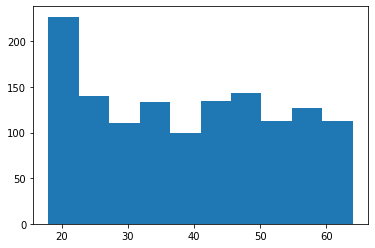

In [7]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

plt.hist(df['age']);

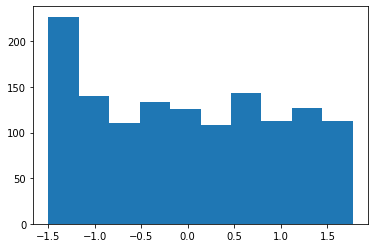

In [8]:
scaler = StandardScaler() 
scaler.fit(df[['age']]) 

df['age_Z'] = scaler.transform(df[['age']]) 
plt.hist(df['age_Z']);

11) Al estandarizar la variable "age", estamos calculando en cuántos años se aleja cada observación respecto a la media muestral de la edad. <br>
1. Verdadero <br>
2. Falso<br>

## Correlacion de columnas

12) Considerando la correlación de Pearson, ¿Cuál variable considera más adecuada para explicar el precio de venta (SalesPrice)? 
- descripcion del dataset 
  https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt

1. GrLivArea
2. BedroomAbvGr
3. KitchenAbvGr
4. OverallCond
5. Pesos

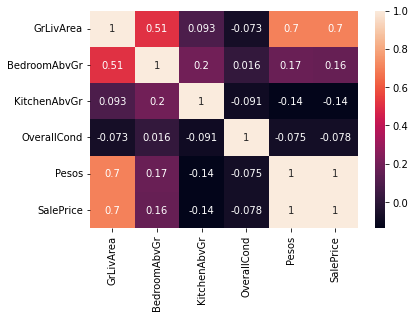

In [9]:
df = pd.read_csv("./datasets/ML_Houses_dataset.csv")
df_houses = df[['GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallCond', 
                       'Pesos', 'Alley', 'Street', 'WallMat','SalePrice']]
                       
corr = df_houses.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True);

13) ¿Consideras necesario eliminar alguna de las variables del análisis? 
1. GrLivArea
2. BedroomAbvGr
3. KitchenAbvGr
4. OverallCond
5. Pesos
6. No hay información suficiente para decidir eliminar alguna. 

# Clasificacion

Que score tendriamos en el árbol de desición

In [10]:
df_houses['SalePriceBinary'] = pd.cut(x = df_houses['SalePrice'],
                                        bins=[df_houses['SalePrice'].min()-1,
                                        df_houses['SalePrice'].mean(),
                                        df_houses['SalePrice'].max()+1], 
                                        labels=['barato', 'caro'])

/tmp/ipykernel_9895/2925044733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_houses['SalePriceBinary'] = pd.cut(x = df_houses['SalePrice'],


In [11]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

y_encoder = LabelEncoder().fit(df_houses['SalePriceBinary'])
y = y_encoder.transform(df_houses['SalePriceBinary'])
X = df_houses.drop(columns=['Alley','Street','WallMat', 'SalePrice', 'Pesos', 'SalePriceBinary'])

X_scaled = MinMaxScaler().fit_transform(X)

14) En qué rango se encuentra el accuracy del modelo?
1. [0.65 , 0.7)
2. [0.7 , 0.8)
3. [0.8 , 0.9)
4. [0.9 , 0.95]
5. Menor a 0.65 o mayor a 0.95

# Metricas

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = [0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1]
y_pred = [1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]

15) Cual es el valor de la exactitud (Accuracy)?

1. 0.62
2. 0.69
3. 0.71 
4. 0.83

# Ajustando Metricas

In [13]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_test = [0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1]
y_pred = [1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]

16) Considerando la clase de los 1, ¿Cuál es la cantidad de falsos positivos?<br>
1. 5<br>
2. 4<br>
3. 3<br>
4. 1<br>

# K-means

In [15]:
pip install kneed

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from kneed import KneeLocator
import warnings
warnings.filterwarnings('ignore')

In [17]:
X, y = make_blobs(n_samples=200,centers=6,cluster_std=2.75,random_state=42)

17) Considerando la suma del error cuadrático (SSE), ¿Cuál sería el número óptimo de clusters?<br>

1. 1<br>
2. 2<br>
3. 3<br>
4. 4<br>
5. 5<br>
6. 6<br>